In [1]:
#import all the packages I will need
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



In [2]:
#import the california housing dataset from scikitlearn
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing(as_frame=True)

df = housing_data.frame

In [3]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

<Axes: ylabel='MedHouseVal'>

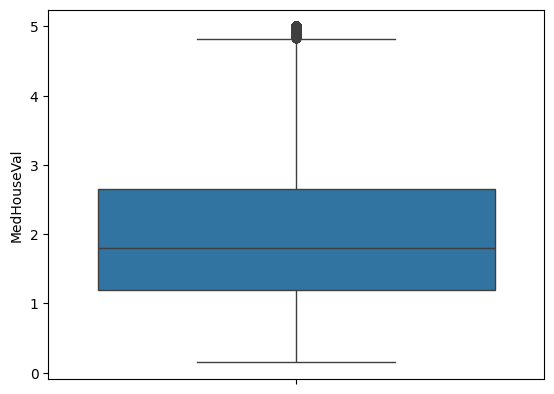

In [4]:
sns.boxplot(data=df['MedHouseVal'])

(array([2247., 7436., 6098., 2990., 1060.,  428.,  178.,   93.,   47.,
          63.]),
 array([ 0.4999 ,  1.94992,  3.39994,  4.84996,  6.29998,  7.75   ,
         9.20002, 10.65004, 12.10006, 13.55008, 15.0001 ]),
 <BarContainer object of 10 artists>)

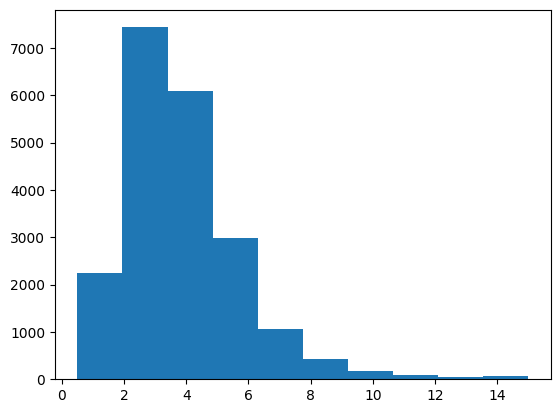

In [5]:
plt.hist(df['MedInc'].dropna())

(array([ 719., 1104., 2235., 2681., 2510., 2354., 3555., 1900., 1616.,
        1966.]),
 array([ 1. ,  6.1, 11.2, 16.3, 21.4, 26.5, 31.6, 36.7, 41.8, 46.9, 52. ]),
 <BarContainer object of 10 artists>)

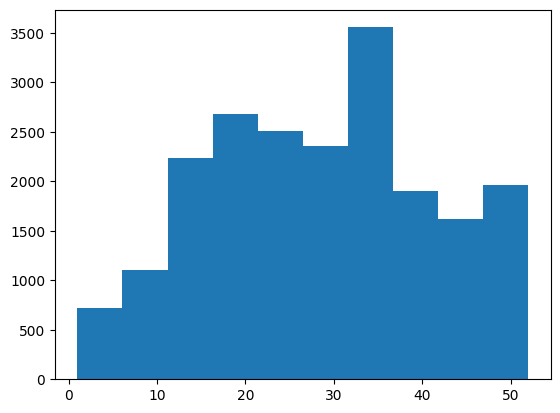

In [6]:
plt.hist(df['HouseAge'].dropna())

(array([2.000e+00, 3.600e+01, 4.090e+02, 2.421e+03, 5.835e+03, 6.510e+03,
        3.435e+03, 1.267e+03, 4.040e+02, 9.400e+01, 5.000e+01, 3.200e+01,
        1.400e+01, 1.000e+01, 1.200e+01, 6.000e+00, 1.400e+01, 7.000e+00,
        6.000e+00, 7.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 20 artists>)

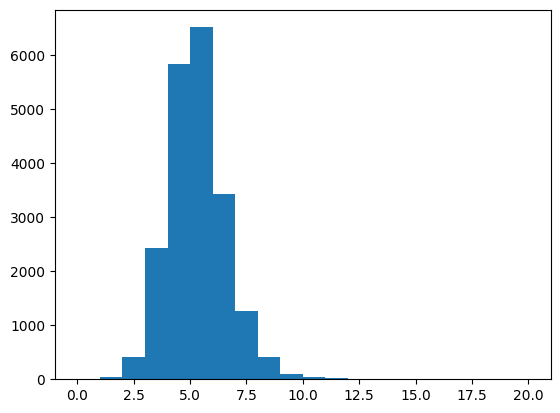

In [7]:
plt.hist(df['AveRooms'].dropna(), bins=20, range=(0,20))

In [8]:
df.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


<Axes: >

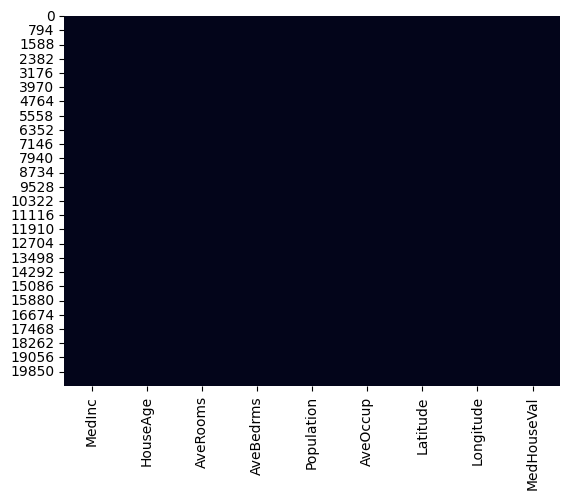

In [9]:
#check that the data has no missing entries
sns.heatmap(df.isnull(),cbar=False)

In [10]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [11]:
#Here i select my y and x  values. My x values of course is essentially going to be a vector with each having their own coefficient
y_data = df['MedHouseVal']
x_data = df.drop('MedHouseVal', axis = 1)#.drop('MedInc', axis = 1)

In [12]:
#Create the traing data set
from sklearn.model_selection import train_test_split

x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(x_data, y_data, test_size = 0.3)

Using ordinary least squares, as the values are not binary outcomes as in a logistic linear regression

In [13]:
# create the model based upon ordinary least squares
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [14]:
model.fit(x_data_train, y_data_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
#Extracting parameters
i = 0
for coeff in model.coef_:

    print(f'The value for {df.columns[i]} is: {coeff}')
    i += 1

print(f'The value for the intercept is {model.intercept_}')

The value for MedInc is: 0.43513007525158853
The value for HouseAge is: 0.009638068240367871
The value for AveRooms is: -0.09819796482155954
The value for AveBedrms is: 0.6024953378014865
The value for Population is: -5.40841037849002e-07
The value for AveOccup is: -0.0037068696184702063
The value for Latitude is: -0.42454398634142443
The value for Longitude is: -0.43740430343333125
The value for the intercept is -37.18177074478421


In [16]:
predictions = model.predict(x_data_test)


In [17]:
#Here I look at Rsquared and RMSE
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_data_test, predictions)
print(f"R squared is {r2}.")
rmse = np.sqrt(mean_squared_error(y_data_test, predictions))
print(f"RMSE is {rmse}.")

R squared is 0.6074858236173737.
RMSE is 0.7229422264533977.


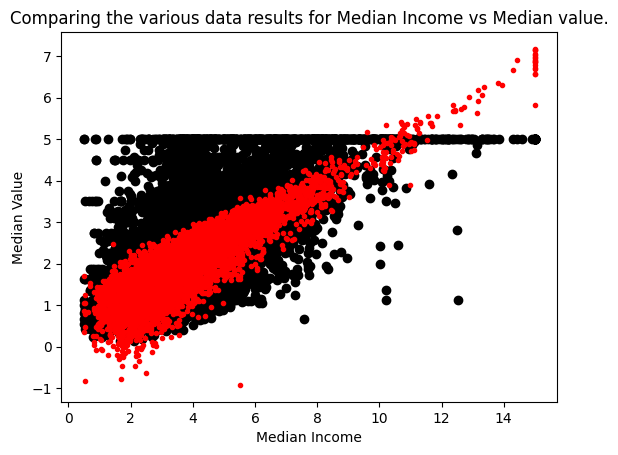

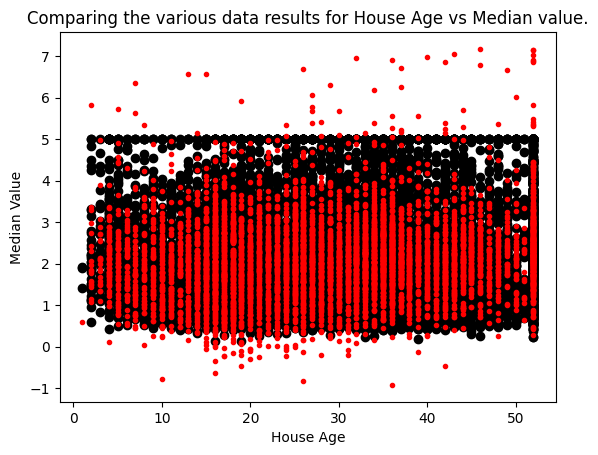

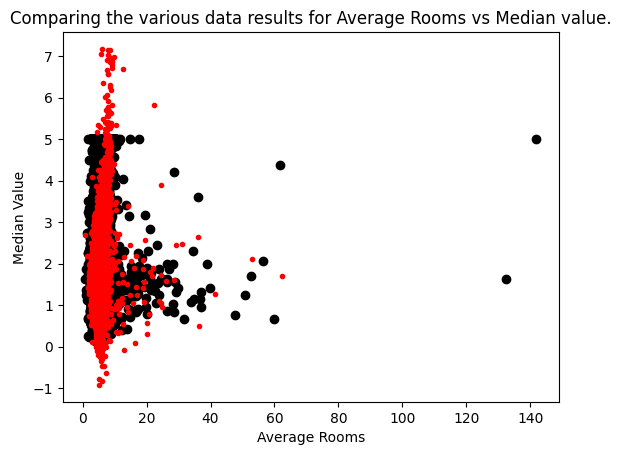

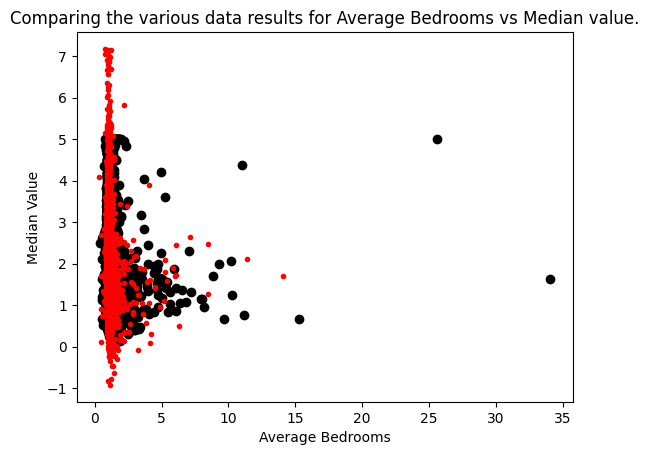

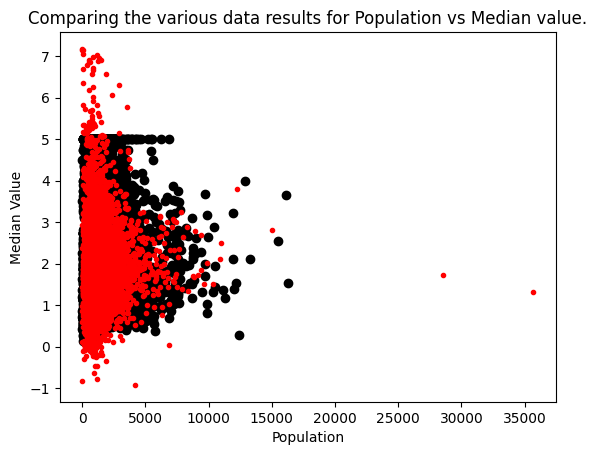

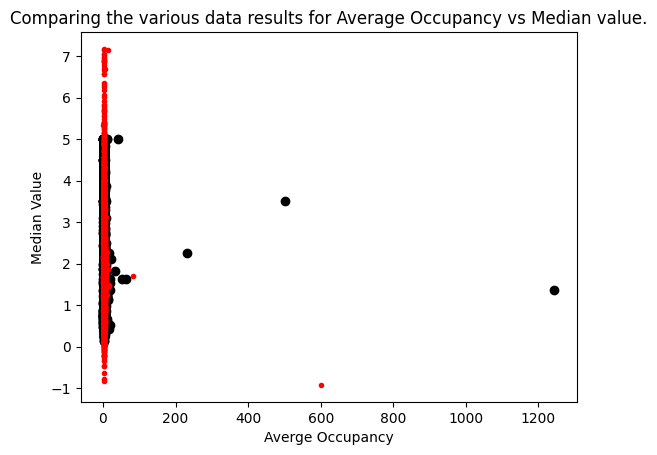

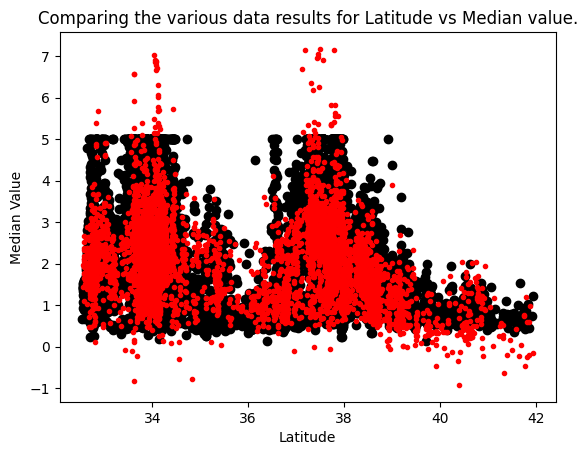

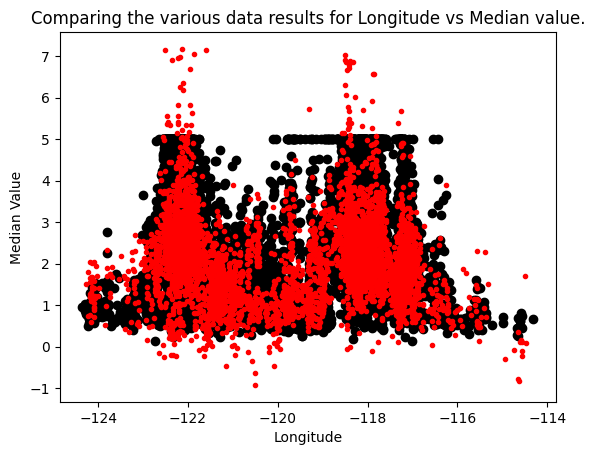

In [18]:
#Here I plot the training and predictions to get a feel for the data

plt.figure(1)
plt.plot(x_data_train['MedInc'], y_data_train, 'ok')
plt.plot(x_data_test['MedInc'],predictions,'.r')
plt.xlabel('Median Income')
plt.ylabel('Median Value')
plt.title('Comparing the various data results for Median Income vs Median value.')
plt.show()


plt.figure(2)
plt.plot(x_data_train['HouseAge'], y_data_train, 'ok')
plt.plot(x_data_test['HouseAge'],predictions,'.r')
plt.xlabel('House Age')
plt.ylabel('Median Value')
plt.title('Comparing the various data results for House Age vs Median value.')
plt.show()

plt.figure(3)
plt.plot(x_data_train['AveRooms'], y_data_train, 'ok')
plt.plot(x_data_test['AveRooms'],predictions,'.r')
plt.xlabel('Average Rooms')
plt.ylabel('Median Value')
plt.title('Comparing the various data results for Average Rooms vs Median value.')
plt.show()

plt.figure(4)
plt.plot(x_data_train['AveBedrms'], y_data_train, 'ok')
plt.plot(x_data_test['AveBedrms'],predictions,'.r')
plt.xlabel('Average Bedrooms')
plt.ylabel('Median Value')
plt.title('Comparing the various data results for Average Bedrooms vs Median value.')
plt.show()

plt.figure(5)
plt.plot(x_data_train['Population'], y_data_train, 'ok')
plt.plot(x_data_test['Population'],predictions,'.r')
plt.xlabel('Population')
plt.ylabel('Median Value')
plt.title('Comparing the various data results for Population vs Median value.')
plt.show()

plt.figure(6)
plt.plot(x_data_train['AveOccup'], y_data_train, 'ok')
plt.plot(x_data_test['AveOccup'],predictions,'.r')
plt.xlabel('Averge Occupancy')
plt.ylabel('Median Value')
plt.title('Comparing the various data results for Average Occupancy vs Median value.')
plt.show()

plt.figure(7)
plt.plot(x_data_train['Latitude'], y_data_train, 'ok')
plt.plot(x_data_test['Latitude'],predictions,'.r')
plt.xlabel('Latitude')
plt.ylabel('Median Value')
plt.title('Comparing the various data results for Latitude vs Median value.')
plt.show()

plt.figure(8)
plt.plot(x_data_train['Longitude'], y_data_train, 'ok')
plt.plot(x_data_test['Longitude'],predictions,'.r')
plt.xlabel('Longitude')
plt.ylabel('Median Value')
plt.title('Comparing the various data results for Longitude vs Median value.')
plt.show()

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        4.000e+00, 1.300e+01, 3.200e+01, 2.830e+02, 1.606e+03, 2.138e+03,
        1.135e+03, 5.130e+02, 2.290e+02, 1.360e+02, 6.300e+01, 2.400e+01,
        1.200e+01, 2.000e+00]),
 array([-5.83135751, -5.33508868, -4.83881985, -4.34255102, -3.84628218,
        -3.35001335, -2.85374452, -2.35747569, -1.86120685, -1.36493802,
        -0.86866919, -0.37240036,  0.12386848,  0.62013731,  1.11640614,
         1.61267497,  2.10894381,  2.60521264,  3.10148147,  3.5977503 ,
         4.09401914]),
 <BarContainer object of 20 artists>)

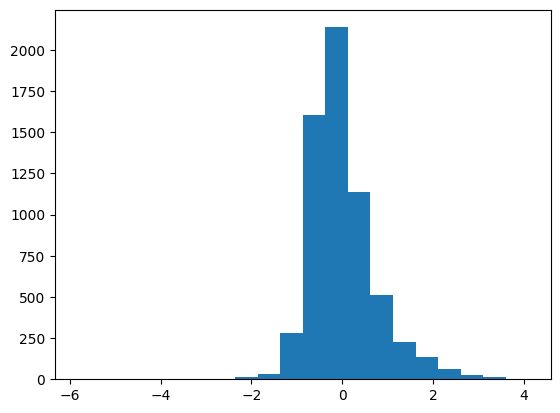

In [19]:
residual = y_data_test - predictions

#Here is plotted a histogram of the residuals to check for normal behaviour in the data

plt.hist(residual, bins=20)


<Axes: ylabel='MedHouseVal'>

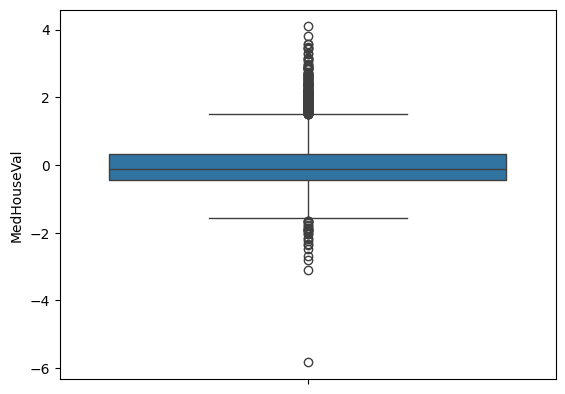

In [20]:
#Again, the normal behviour is being checked by the box and whisker plot

sns.boxplot(residual)

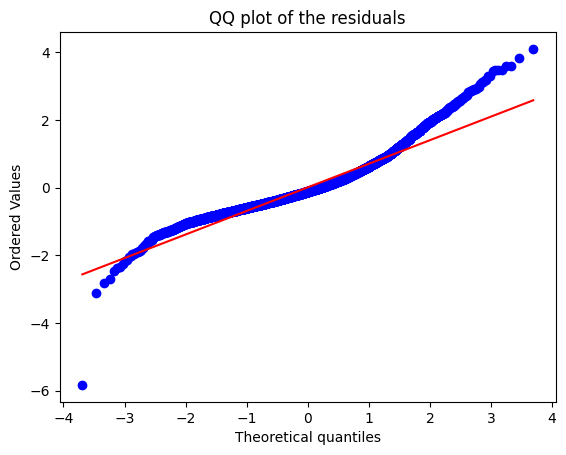

In [21]:
#Here the normal behaviour is being tested by a QQ plot
from scipy import stats

stats.probplot(residual, dist='norm', plot=plt)
plt.title('QQ plot of the residuals')
plt.show()

In [22]:
#Here i do the cross validation, 5 fold
from sklearn.model_selection import cross_validate
cross_val_results = cross_validate(model, x_data, y_data, cv=5,
                                   scoring={"r2": "r2", "rmse": "neg_root_mean_squared_error"}, return_estimator=True)
cross_val_results

{'fit_time': array([0.00404763, 0.00232816, 0.00224781, 0.00230122, 0.00231123]),
 'score_time': array([0.00142288, 0.00144434, 0.00131035, 0.00107098, 0.00110626]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_r2': array([0.54866323, 0.46820691, 0.55078434, 0.53698703, 0.66051406]),
 'test_rmse': array([-0.69631786, -0.78898504, -0.80387217, -0.73702076, -0.70333835])}

In [23]:
#Here i extract all my parameters

cross_val_r2 = cross_val_results['test_r2']
cross_val_rmse = -cross_val_results['test_rmse']
cross_val_coef = [m.coef_ for m in cross_val_results['estimator']]
cross_val_inter = [c.intercept_ for c in cross_val_results['estimator']]


In [24]:
coeff_df = pd.DataFrame(np.vstack(cross_val_coef), columns=getattr(x_data, "columns", None))
coeff_df['Intercept'] = cross_val_inter
coeff_df['R2'] = cross_val_r2
coeff_df['RMSE'] = cross_val_rmse
print(coeff_df)
print("Mean R²:", cross_val_r2.mean(), "Mean RMSE:", cross_val_rmse.mean())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.436326  0.010916 -0.117212   0.793762   -0.000010 -0.004148 -0.437243   
1  0.428103  0.009728 -0.086515   0.544548   -0.000009 -0.003165 -0.417116   
2  0.435473  0.010241 -0.112835   0.636522    0.000016 -0.003495 -0.426811   
3  0.427296  0.006294 -0.087794   0.544374   -0.000014 -0.003342 -0.410125   
4  0.447847  0.009408 -0.120961   0.710268   -0.000001 -0.008815 -0.421715   

   Longitude  Intercept        R2      RMSE  
0  -0.475120 -41.316338  0.548663  0.696318  
1  -0.433702 -36.985259  0.468207  0.788985  
2  -0.448296 -38.439556  0.550784  0.803872  
3  -0.393447 -32.278299  0.536987  0.737021  
4  -0.429775 -36.390510  0.660514  0.703338  
Mean R²: 0.5530311140279569 Mean RMSE: 0.7459068363518109


In [25]:
#Now I have trained and tested the model, I will now develop the full model, using all the data to fit.
model_final = LinearRegression()
model_final.fit(x_data, y_data)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
#Extracting parameters
i = 0
for coeff in model_final.coef_:

    print(f'The value for {df.columns[i]} is: {coeff}')
    i += 1

print(f'The value for the intercept is {model_final.intercept_}')

The value for MedInc is: 0.4366932931343245
The value for HouseAge is: 0.009435778033237972
The value for AveRooms is: -0.10732204139090447
The value for AveBedrms is: 0.645065693519812
The value for Population is: -3.976389421211576e-06
The value for AveOccup is: -0.003786542654971
The value for Latitude is: -0.42131437752714385
The value for Longitude is: -0.43451375467477743
The value for the intercept is -36.94192020718441


In [27]:
#The above data analysis shows that the data is not normally distributed, so using the ordinary methods for
#obtaining uncertainties on the coefficients are invalid. So, here i do a bootstrap analysis
from sklearn.utils import resample

n_bootstraps = 1000
coef_boot = []
inter_boot = []

for i in range(n_bootstraps):
    x_boot, y_boot = resample(x_data, y_data, random_state=i)
    model_boot = LinearRegression().fit(x_boot, y_boot)
    coef_boot.append(model_boot.coef_)
    inter_boot.append(model_boot.intercept_)

coef_boot = np.array(coef_boot)
inter_boot = np.array(inter_boot)



In [28]:
#Here the uncertainty is being calculated. Since the underlying distribution is not normal, we obtain the percentile
#ranges that are close to 2 sigma for a normal distribution. We also get the standard deviation for a comparison
coef_mean = coef_boot.mean(axis=0)
coef_mean_lower, coef_mean_upper = np.percentile(coef_boot, [2.5, 97.5], axis=0)
inter_mean = inter_boot.mean(axis=0)
inter_mean_lower, inter_mean_upper = np.percentile(inter_boot, [2.5, 97.5], axis=0)
coef_std  = coef_boot.std(axis=0, ddof=0)
inter_std  = inter_boot.std(axis=0, ddof=0)

for i in range(len(coef_mean)):

    if i == 0:
        print(f'The 1st coefficient is {coef_mean[i]} +/- {coef_mean_upper[i]-coef_mean[i]}/{coef_mean[i]-coef_mean_lower[i]} (2.5, 97.5 percentile) & 2 times standard deviation {2*coef_std[i]}')
    elif i == 1:
        print(f'The 2nd coefficient is {coef_mean[i]} +/- {coef_mean_upper[i]-coef_mean[i]}/{coef_mean[i]-coef_mean_lower[i]} (2.5, 97.5 percentile) & 2 times standard deviation {2*coef_std[i]}')
    elif i == 2:
        print(f'The 3rd coefficient is {coef_mean[i]} +/- {coef_mean_upper[i]-coef_mean[i]}/{coef_mean[i]-coef_mean_lower[i]} (2.5, 97.5 percentile) & 2 times standard deviation {2*coef_std[i]}')
    else:
        print(f'The {i+1}th coefficient is {coef_mean[i]} +/- {coef_mean_upper[i]-coef_mean[i]}/{coef_mean[i]-coef_mean_lower[i]} (2.5, 97.5 percentile) & 2 times standard deviation {2*coef_std[i]}')

print(f'The intercept is {inter_mean} +/- {inter_mean_upper-inter_mean}/{inter_mean-inter_mean_lower} (2.5, 97.5 percentile) & 2 times standard deviation {2*inter_std}')

The 1st coefficient is 0.43865359254215364 +/- 0.01757833651865992/0.018623967919744744 (2.5, 97.5 percentile) & 2 times standard deviation 0.018928413024499977
The 2nd coefficient is 0.00949062925124487 +/- 0.0010345896296627185/0.001044113598096516 (2.5, 97.5 percentile) & 2 times standard deviation 0.0011008894468193637
The 3rd coefficient is -0.11055371101798664 +/- 0.02957520745853294/0.027780510942771536 (2.5, 97.5 percentile) & 2 times standard deviation 0.02956966666014416
The 4th coefficient is 0.6713625515373353 +/- 0.20294865294360942/0.18120470678261957 (2.5, 97.5 percentile) & 2 times standard deviation 0.2096559373716379
The 5th coefficient is -3.049162474542005e-06 +/- 1.2560005270324152e-05/9.748795935367181e-06 (2.5, 97.5 percentile) & 2 times standard deviation 1.133392656247004e-05
The 6th coefficient is -0.008193634365927476 +/- 0.0055610086674164096/0.04510105527788229 (2.5, 97.5 percentile) & 2 times standard deviation 0.04004308518756944
The 7th coefficient is -0